In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [7]:
data =pd.read_csv('Iris.csv')

In [9]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [12]:
X = data.drop(columns = ['Species'])
y = data['Species']

scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
n_component = 2
pca = PCA(n_component)
principal_component = pca.fit_transform(X_scaled)

In [25]:
principal_df = pd.DataFrame(principal_component,columns = ['PC1','PC2'])
principal_df['Species'] = y.values

print(principal_df)

          PC1       PC2         Species
0   -2.816339  0.506051     Iris-setosa
1   -2.645527 -0.651799     Iris-setosa
2   -2.879481 -0.321036     Iris-setosa
3   -2.810934 -0.577363     Iris-setosa
4   -2.879884  0.670468     Iris-setosa
..        ...       ...             ...
145  2.424421  0.377119  Iris-virginica
146  2.164220 -0.915696  Iris-virginica
147  2.139796  0.254272  Iris-virginica
148  2.029480  0.998725  Iris-virginica
149  1.674835 -0.046213  Iris-virginica

[150 rows x 3 columns]


In [26]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.7470533  0.18435257]


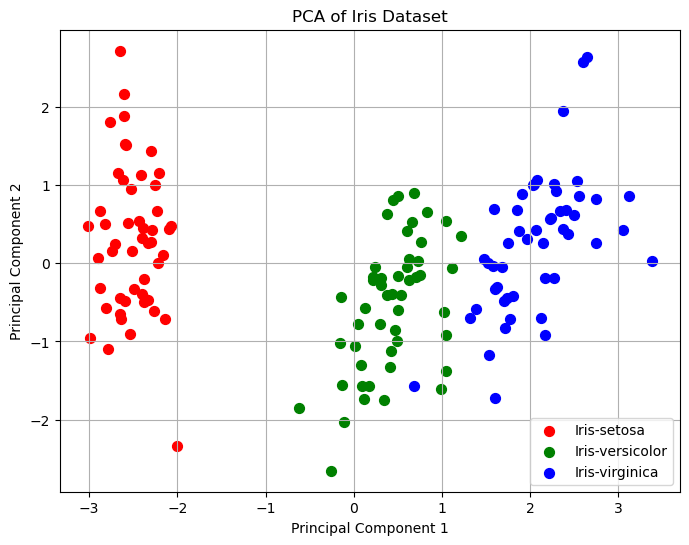

In [29]:
# Plot the principal components
plt.figure(figsize=(8, 6))
targets = data['Species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
 indices_to_keep = principal_df['Species'] == target
 plt.scatter(principal_df.loc[indices_to_keep, 'PC1'],
 principal_df.loc[indices_to_keep, 'PC2'],
 c=color, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('PCA of Iris Dataset')
plt.grid()
plt.show()